In [2]:
import openmeteo_requests
import pandas as pd
import requests_cache
from retry_requests import retry
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import time

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [14]:
regions = [
    {"name": "ALAMEDA", "latitude": 37.6090291, "longitude": -121.899142},
    {"name": "AMADOR", "latitude": 38.449089, "longitude": -120.5911018},
    {"name": "BUTTE", "latitude": 39.6519275, "longitude": -121.5858444},
    {"name": "CALAVERAS", "latitude": 38.2558181, "longitude": -120.4981492},
    {"name": "COLUSA", "latitude": 39.1465578, "longitude": -122.2209563},
    {"name": "CONTRA COSTA", "latitude": 37.9034806, "longitude": -121.9175345},
    {"name": "DEL NORTE", "latitude": 41.7261767, "longitude": -123.91328},
    {"name": "EL DORADO", "latitude": 38.7574137, "longitude": -120.5276129},
    {"name": "FRESNO", "latitude": 36.7394421, "longitude": -119.78483},
    {"name": "GLENN", "latitude": 39.5912766, "longitude": -122.3778662},
    {"name": "HUMBOLDT", "latitude": 40.7450055, "longitude": -123.8695086},
    {"name": "IMPERIAL", "latitude": 32.8537575, "longitude": -115.5696494},
    {"name": "INYO", "latitude": 36.5760884, "longitude": -117.0708416},
    {"name": "KERN", "latitude": 35.4937274, "longitude": -118.8596804},
    {"name": "KINGS", "latitude": 36.0988479, "longitude": -119.8815209},
    {"name": "LAKE", "latitude": 39.0839643, "longitude": -122.7633036},
    {"name": "LASSEN", "latitude": 40.6766708, "longitude": -120.6374573},
    {"name": "LOS ANGELES", "latitude": 34.0522342, "longitude": -118.2436849},
    {"name": "MADERA", "latitude": 36.9613355, "longitude": -120.0607176},
    {"name": "MARIN", "latitude": 38.083403, "longitude": -122.7633036},
    {"name": "MARIPOSA", "latitude": 37.5793783, "longitude": -119.9051725},
    {"name": "MENDOCINO", "latitude": 39.5500194, "longitude": -123.438353},
    {"name": "MERCED", "latitude": 37.3021632, "longitude": -120.4829677},
    {"name": "MODOC", "latitude": 41.5866485, "longitude": -120.9876321},
    {"name": "MONO", "latitude": 37.9218608, "longitude": -118.9528645},
    {"name": "MONTEREY", "latitude": 36.6002378, "longitude": -121.8946761},
    {"name": "NAPA", "latitude": 38.5024689, "longitude": -122.2653883},
    {"name": "NEVADA", "latitude": 39.1346666, "longitude": -121.1710389},
    {"name": "ORANGE", "latitude": 33.7174708, "longitude": -117.8311428},
    {"name": "PLACER", "latitude": 39.0915751, "longitude": -120.8039474},
    {"name": "PLUMAS", "latitude": 40.0035599, "longitude": -120.8039474},
    {"name": "RIVERSIDE", "latitude": 33.9533487, "longitude": -117.3961564},
    {"name": "SACRAMENTO", "latitude": 38.5815719, "longitude": -121.4943996},
    {"name": "SAN BENITO", "latitude": 36.5760884, "longitude": -121.0778946},
    {"name": "SAN BERNARDINO", "latitude": 34.1083449, "longitude": -117.2897652},
    {"name": "SAN DIEGO", "latitude": 32.715738, "longitude": -117.1610838},
    {"name": "SAN JOAQUIN", "latitude": 37.9175935, "longitude": -121.1710389},
    {"name": "SAN LUIS OBISPO", "latitude": 35.2827524, "longitude": -120.6596156},
    {"name": "SAN MATEO", "latitude": 37.5629917, "longitude": -122.3255254},
    {"name": "SANTA BARBARA", "latitude": 34.4208305, "longitude": -119.6981901},
    {"name": "SANTA CLARA", "latitude": 37.3541079, "longitude": -121.9552356},
    {"name": "SANTA CRUZ", "latitude": 36.9741171, "longitude": -122.0307963},
    {"name": "SHASTA", "latitude": 40.7908864, "longitude": -122.4177432},
    {"name": "SIERRA", "latitude": 39.5943786, "longitude": -120.8039474},
    {"name": "SISKIYOU", "latitude": 41.5919886, "longitude": -122.5405876},
    {"name": "SOLANO", "latitude": 38.3104969, "longitude": -121.9017954},
    {"name": "SONOMA", "latitude": 38.5781728, "longitude": -122.9888319},
    {"name": "STANISLAUS", "latitude": 37.5090711, "longitude": -120.9876321},
    {"name": "SUTTER", "latitude": 39.0217444, "longitude": -121.6916115},
    {"name": "TEHAMA", "latitude": 40.0982152, "longitude": -122.174605},
    {"name": "TRINITY", "latitude": 40.6323735, "longitude": -123.1603391},
    {"name": "TULARE", "latitude": 36.2077288, "longitude": -119.3473379},
    {"name": "TUOLUMNE", "latitude": 38.0291832, "longitude": -119.9740534},
    {"name": "VENTURA", "latitude": 34.274646, "longitude": -119.2290316},
    {"name": "YOLO", "latitude": 38.7646026, "longitude": -121.9017954},
    {"name": "YUBA", "latitude": 39.2547027, "longitude": -121.3998995},
{"name": "Alberta, Canada", "latitude": 55.001251, "longitude": -115.002136},
    {"name": "Brooks, Alberta, Canada", "latitude": 50.571027, "longitude": -111.893005},
    {"name": "Edmonton, Alberta, Canada", "latitude": 53.546205, "longitude": -113.491241},
    {"name": "Fort McMurray, Alberta, Canada", "latitude": 56.729200, "longitude": -111.388522},
    {"name": "Grande Prairie, Alberta, Canada", "latitude": 55.171080, "longitude": -118.794987},
    {"name": "Lethbridge, Alberta, Canada", "latitude": 49.695600, "longitude": -112.845600},
    {"name": "Medicine Hat, Alberta, Canada", "latitude": 50.040547, "longitude": -110.676427},
    {"name": "Red Deer, Alberta, Canada", "latitude": 52.268111, "longitude": -113.811238},
    {"name": "Barrie, Ontario, Canada", "latitude": 44.389355, "longitude": -79.690331},
    {"name": "Kingston, Ontario, Canada", "latitude": 44.231172, "longitude": -76.485954},
    {"name": "London, Ontario, Canada", "latitude": 42.983392, "longitude": -81.233041},
    {"name": "Sudbury, Ontario, Canada", "latitude": 46.491871, "longitude": -80.993168},
    {"name": "Toronto, Ontario, Canada", "latitude": 43.653226, "longitude": -79.383184},
    {"name": "Winnipeg, Manitoba, Canada", "latitude": 49.895136, "longitude": -97.138374},
    {"name": "Kelowna, British Columbia, Canada", "latitude": 49.888001, "longitude": -119.496010},
    {"name": "Regina, Saskatchewan, Canada", "latitude": 50.445211, "longitude": -104.618896},
    {"name": "Saskatoon, Saskatchewan, Canada", "latitude": 52.133214, "longitude": -106.670046},
    {"name": "Amritsar, Punjab, India", "latitude": 31.634000, "longitude": 74.872300},
    {"name": "Bathinda, Punjab, India", "latitude": 30.211000, "longitude": 74.945500},
    {"name": "Faridkot, Punjab, India", "latitude": 30.678500, "longitude": 74.755800},
    {"name": "Fatehgarh Sahib, Punjab, India", "latitude": 30.645200, "longitude": 76.400400},
    {"name": "Fazilka, Punjab, India", "latitude": 30.403100, "longitude": 74.028800},
    {"name": "Ferozepur, Punjab, India", "latitude": 30.925400, "longitude": 74.613100},
    {"name": "Gurdaspur, Punjab, India", "latitude": 32.041900, "longitude": 75.408800},
    {"name": "Hoshiarpur, Punjab, India", "latitude": 31.532400, "longitude": 75.912500},
    {"name": "Jalandhar, Punjab, India", "latitude": 31.326000, "longitude": 75.576200},
    {"name": "Kapurthala, Punjab, India", "latitude": 31.380100, "longitude": 75.381100},
    {"name": "Ludhiana, Punjab, India", "latitude": 30.900000, "longitude": 75.857300},
    {"name": "Mansa, Punjab, India", "latitude": 29.991000, "longitude": 75.393700},
    {"name": "Moga, Punjab, India", "latitude": 30.817800, "longitude": 75.170000},
    {"name": "Pathankot, Punjab, India", "latitude": 32.264000, "longitude": 75.642100},
    {"name": "Patiala, Punjab, India", "latitude": 30.339800, "longitude": 76.386900},
    {"name": "Rupnagar, Punjab, India", "latitude": 30.968300, "longitude": 76.527100},
    {"name": "Sangrur, Punjab, India", "latitude": 30.245400, "longitude": 75.844900},
    {"name": "SAS Nagar, Punjab, India", "latitude": 30.704600, "longitude": 76.717900},
    {"name": "Shahid Bhagat Singh Nagar, Punjab, India", "latitude": 31.122700, "longitude": 76.132000},
    {"name": "Sri Muktsar Sahib, Punjab, India", "latitude": 30.477100, "longitude": 74.515000},
    {"name": "Tarn Taran, Punjab, India", "latitude": 31.451800, "longitude": 74.927800}
]


In [ ]:

#set up Open-Meteo client with caching and retry
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

#api endpoint
url = "https://customer-archive-api.open-meteo.com/v1/archive"

all_data = []

#loop through each region
for region in regions:
    print(f"Fetching data for {region['name']}...")

    params = {
        "latitude": region["latitude"],
        "longitude": region["longitude"],
        "start_date": "1998-01-01",
        "end_date": "2019-12-31",
        "daily": [
            "weather_code", "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min",
            "apparent_temperature_mean", "apparent_temperature_max", "apparent_temperature_min",
            "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum",
            "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max",
            "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum",
            "et0_fao_evapotranspiration", "cloud_cover_mean", "cloud_cover_max",
            "cloud_cover_min", "dew_point_2m_mean", "dew_point_2m_max", "dew_point_2m_min",
            "et0_fao_evapotranspiration_sum", "growing_degree_days_base_0_limit_50",
            "leaf_wetness_probability_mean", "precipitation_probability_mean",
            "precipitation_probability_min", "relative_humidity_2m_mean",
            "relative_humidity_2m_max", "relative_humidity_2m_min",
            "snowfall_water_equivalent_sum", "pressure_msl_mean", "pressure_msl_max",
            "pressure_msl_min", "wind_speed_10m_min", "wind_gusts_10m_min",
            "wind_speed_10m_mean", "wind_gusts_10m_mean", "winddirection_10m_dominant",
            "visibility_max", "visibility_min", "visibility_mean", "updraft_max",
            "surface_pressure_min", "surface_pressure_max", "surface_pressure_mean",
            "soil_moisture_0_to_100cm_mean", "soil_moisture_0_to_10cm_mean",
            "soil_moisture_0_to_7cm_mean", "soil_moisture_28_to_100cm_mean",
            "soil_moisture_7_to_28cm_mean", "soil_temperature_0_to_100cm_mean",
            "soil_temperature_0_to_7cm_mean", "soil_temperature_28_to_100cm_mean",
            "soil_temperature_7_to_28cm_mean", "vapour_pressure_deficit_max",
            "wet_bulb_temperature_2m_min", "wet_bulb_temperature_2m_max",
            "wet_bulb_temperature_2m_mean"
        ],
        "temperature_unit": "fahrenheit",
        "wind_speed_unit": "mph",
        "apikey": ""
    }

    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]

    #grab the daily weather data
    daily = response.Daily()
    daily_weather_code = daily.Variables(0).ValuesAsNumpy()
    daily_temperature_2m_mean = daily.Variables(1).ValuesAsNumpy()
    daily_temperature_2m_max = daily.Variables(2).ValuesAsNumpy()
    daily_temperature_2m_min = daily.Variables(3).ValuesAsNumpy()
    daily_apparent_temperature_mean = daily.Variables(4).ValuesAsNumpy()
    daily_apparent_temperature_max = daily.Variables(5).ValuesAsNumpy()
    daily_apparent_temperature_min = daily.Variables(6).ValuesAsNumpy()
    daily_sunrise = daily.Variables(7).ValuesInt64AsNumpy()
    daily_sunset = daily.Variables(8).ValuesInt64AsNumpy()
    daily_daylight_duration = daily.Variables(9).ValuesAsNumpy()
    daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
    daily_precipitation_sum = daily.Variables(11).ValuesAsNumpy()
    daily_rain_sum = daily.Variables(12).ValuesAsNumpy()
    daily_snowfall_sum = daily.Variables(13).ValuesAsNumpy()
    daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
    daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
    daily_wind_gusts_10m_max = daily.Variables(16).ValuesAsNumpy()
    daily_wind_direction_10m_dominant = daily.Variables(17).ValuesAsNumpy()
    daily_shortwave_radiation_sum = daily.Variables(18).ValuesAsNumpy()
    daily_et0_fao_evapotranspiration = daily.Variables(19).ValuesAsNumpy()
    daily_cloud_cover_mean = daily.Variables(20).ValuesAsNumpy()
    daily_cloud_cover_max = daily.Variables(21).ValuesAsNumpy()
    daily_cloud_cover_min = daily.Variables(22).ValuesAsNumpy()
    daily_dew_point_2m_mean = daily.Variables(23).ValuesAsNumpy()
    daily_dew_point_2m_max = daily.Variables(24).ValuesAsNumpy()
    daily_dew_point_2m_min = daily.Variables(25).ValuesAsNumpy()
    daily_et0_fao_evapotranspiration_sum = daily.Variables(26).ValuesAsNumpy()
    daily_growing_degree_days_base_0_limit_50 = daily.Variables(27).ValuesAsNumpy()
    daily_leaf_wetness_probability_mean = daily.Variables(28).ValuesAsNumpy()
    daily_precipitation_probability_mean = daily.Variables(29).ValuesAsNumpy()
    daily_precipitation_probability_min = daily.Variables(30).ValuesAsNumpy()
    daily_relative_humidity_2m_mean = daily.Variables(31).ValuesAsNumpy()
    daily_relative_humidity_2m_max = daily.Variables(32).ValuesAsNumpy()
    daily_relative_humidity_2m_min = daily.Variables(33).ValuesAsNumpy()
    daily_snowfall_water_equivalent_sum = daily.Variables(34).ValuesAsNumpy()
    daily_pressure_msl_mean = daily.Variables(35).ValuesAsNumpy()
    daily_pressure_msl_max = daily.Variables(36).ValuesAsNumpy()
    daily_pressure_msl_min = daily.Variables(37).ValuesAsNumpy()
    daily_wind_speed_10m_min = daily.Variables(38).ValuesAsNumpy()
    daily_wind_gusts_10m_min = daily.Variables(39).ValuesAsNumpy()
    daily_wind_speed_10m_mean = daily.Variables(40).ValuesAsNumpy()
    daily_wind_gusts_10m_mean = daily.Variables(41).ValuesAsNumpy()
    daily_winddirection_10m_dominant = daily.Variables(42).ValuesAsNumpy()
    daily_visibility_max = daily.Variables(43).ValuesAsNumpy()
    daily_visibility_min = daily.Variables(44).ValuesAsNumpy()
    daily_visibility_mean = daily.Variables(45).ValuesAsNumpy()
    daily_updraft_max = daily.Variables(46).ValuesAsNumpy()
    daily_surface_pressure_min = daily.Variables(47).ValuesAsNumpy()
    daily_surface_pressure_max = daily.Variables(48).ValuesAsNumpy()
    daily_surface_pressure_mean = daily.Variables(49).ValuesAsNumpy()
    daily_soil_moisture_0_to_100cm_mean = daily.Variables(50).ValuesAsNumpy()
    daily_soil_moisture_0_to_10cm_mean = daily.Variables(51).ValuesAsNumpy()
    daily_soil_moisture_0_to_7cm_mean = daily.Variables(52).ValuesAsNumpy()
    daily_soil_moisture_28_to_100cm_mean = daily.Variables(53).ValuesAsNumpy()
    daily_soil_moisture_7_to_28cm_mean = daily.Variables(54).ValuesAsNumpy()
    daily_soil_temperature_0_to_100cm_mean = daily.Variables(55).ValuesAsNumpy()
    daily_soil_temperature_0_to_7cm_mean = daily.Variables(56).ValuesAsNumpy()
    daily_soil_temperature_28_to_100cm_mean = daily.Variables(57).ValuesAsNumpy()
    daily_soil_temperature_7_to_28cm_mean = daily.Variables(58).ValuesAsNumpy()
    daily_vapour_pressure_deficit_max = daily.Variables(59).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_min = daily.Variables(60).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_max = daily.Variables(61).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_mean = daily.Variables(62).ValuesAsNumpy()

    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        ),
        "region": region["name"],
        "weather_code": daily_weather_code,
        "temperature_2m_mean": daily_temperature_2m_mean,
        "temperature_2m_max": daily_temperature_2m_max,
        "temperature_2m_min": daily_temperature_2m_min,
        "apparent_temperature_mean": daily_apparent_temperature_mean,
        "apparent_temperature_max": daily_apparent_temperature_max,
        "apparent_temperature_min": daily_apparent_temperature_min,
        "sunrise": daily_sunrise,
        "sunset": daily_sunset,
        "daylight_duration": daily_daylight_duration,
        "sunshine_duration": daily_sunshine_duration,
        "precipitation_sum": daily_precipitation_sum,
        "rain_sum": daily_rain_sum,
        "snowfall_sum": daily_snowfall_sum,
        "precipitation_hours": daily_precipitation_hours,
        "wind_speed_10m_max": daily_wind_speed_10m_max,
        "wind_gusts_10m_max": daily_wind_gusts_10m_max,
        "wind_direction_10m_dominant": daily_wind_direction_10m_dominant,
        "shortwave_radiation_sum": daily_shortwave_radiation_sum,
        "et0_fao_evapotranspiration": daily_et0_fao_evapotranspiration,
        "cloud_cover_mean": daily_cloud_cover_mean,
        "cloud_cover_max": daily_cloud_cover_max,
        "cloud_cover_min": daily_cloud_cover_min,
        "dew_point_2m_mean": daily_dew_point_2m_mean,
        "dew_point_2m_max": daily_dew_point_2m_max,
        "dew_point_2m_min": daily_dew_point_2m_min,
        "et0_fao_evapotranspiration_sum": daily_et0_fao_evapotranspiration_sum,
        "growing_degree_days_base_0_limit_50": daily_growing_degree_days_base_0_limit_50,
        "leaf_wetness_probability_mean": daily_leaf_wetness_probability_mean,
        "precipitation_probability_mean": daily_precipitation_probability_mean,
        "precipitation_probability_min": daily_precipitation_probability_min,
        "relative_humidity_2m_mean": daily_relative_humidity_2m_mean,
        "relative_humidity_2m_max": daily_relative_humidity_2m_max,
        "relative_humidity_2m_min": daily_relative_humidity_2m_min,
        "snowfall_water_equivalent_sum": daily_snowfall_water_equivalent_sum,
        "pressure_msl_mean": daily_pressure_msl_mean,
        "pressure_msl_max": daily_pressure_msl_max,
        "pressure_msl_min": daily_pressure_msl_min,
        "wind_speed_10m_min": daily_wind_speed_10m_min,
        "wind_gusts_10m_min": daily_wind_gusts_10m_min,
        "wind_speed_10m_mean": daily_wind_speed_10m_mean,
        "wind_gusts_10m_mean": daily_wind_gusts_10m_mean,
        "winddirection_10m_dominant": daily_winddirection_10m_dominant,
        "visibility_max": daily_visibility_max,
        "visibility_min": daily_visibility_min,
        "visibility_mean": daily_visibility_mean,
        "updraft_max": daily_updraft_max,
        "surface_pressure_min": daily_surface_pressure_min,
        "surface_pressure_max": daily_surface_pressure_max,
        "surface_pressure_mean": daily_surface_pressure_mean,
        "soil_moisture_0_to_100cm_mean": daily_soil_moisture_0_to_100cm_mean,
        "soil_moisture_0_to_10cm_mean": daily_soil_moisture_0_to_10cm_mean,
        "soil_moisture_0_to_7cm_mean": daily_soil_moisture_0_to_7cm_mean,
        "soil_moisture_28_to_100cm_mean": daily_soil_moisture_28_to_100cm_mean,
        "soil_moisture_7_to_28cm_mean": daily_soil_moisture_7_to_28cm_mean,
        "soil_temperature_0_to_100cm_mean": daily_soil_temperature_0_to_100cm_mean,
        "soil_temperature_0_to_7cm_mean": daily_soil_temperature_0_to_7cm_mean,
        "soil_temperature_28_to_100cm_mean": daily_soil_temperature_28_to_100cm_mean,
        "soil_temperature_7_to_28cm_mean": daily_soil_temperature_7_to_28cm_mean,
        "vapour_pressure_deficit_max": daily_vapour_pressure_deficit_max,
        "wet_bulb_temperature_2m_min": daily_wet_bulb_temperature_2m_min,
        "wet_bulb_temperature_2m_max": daily_wet_bulb_temperature_2m_max,
        "wet_bulb_temperature_2m_mean": daily_wet_bulb_temperature_2m_mean
    }

    daily_df = pd.DataFrame(data=daily_data)
    all_data.append(daily_df)

#put everything into one big dataframe and save
final_df = pd.concat(all_data, ignore_index=True)
final_df.to_csv("daily_weather_regions_1998_2020.csv", index=False)
print(final_df.head())


Fetching data for ALAMEDA...
Fetching data for AMADOR...
Fetching data for BUTTE...
Fetching data for CALAVERAS...
Fetching data for COLUSA...
Fetching data for CONTRA COSTA...
Fetching data for DEL NORTE...
Fetching data for EL DORADO...
Fetching data for FRESNO...
Fetching data for GLENN...
Fetching data for HUMBOLDT...
Fetching data for IMPERIAL...
Fetching data for INYO...
Fetching data for KERN...
Fetching data for KINGS...
Fetching data for LAKE...
Fetching data for LASSEN...
Fetching data for LOS ANGELES...
Fetching data for MADERA...
Fetching data for MARIN...
Fetching data for MARIPOSA...
Fetching data for MENDOCINO...
Fetching data for MERCED...
Fetching data for MODOC...
Fetching data for MONO...
Fetching data for MONTEREY...
Fetching data for NAPA...
Fetching data for NEVADA...
Fetching data for ORANGE...
Fetching data for PLACER...
Fetching data for PLUMAS...
Fetching data for RIVERSIDE...
Fetching data for SACRAMENTO...
Fetching data for SAN BENITO...
Fetching data for SA

In [4]:
#basic overview of columns and types
print(final_df.info())
print()

#summary statistics for all numeric fields
print(final_df.describe())
print()

#how many regions and how much time coverage we have
print("unique regions:", final_df['region'].nunique())
print("date range:", final_df['date'].min(), "to", final_df['date'].max())
print("total records:", len(final_df))
print()

#check if any columns have missing values
missing = final_df.isnull().sum()
print("missing values:")
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   date                                 6120 non-null   datetime64[ns, UTC]
 1   region                               6120 non-null   object             
 2   weather_code                         6120 non-null   float32            
 3   temperature_2m_mean                  6120 non-null   float32            
 4   temperature_2m_max                   6120 non-null   float32            
 5   temperature_2m_min                   6120 non-null   float32            
 6   apparent_temperature_mean            6120 non-null   float32            
 7   apparent_temperature_max             6120 non-null   float32            
 8   apparent_temperature_min             6120 non-null   float32            
 9   sunrise                       

In [ ]:
# load agri datasets
india_agri = pd.read_csv("India Agriculture Crop Production.csv")
canada_regional = pd.read_csv("canada_regional.csv")
canada_states = pd.read_csv("canada_states.csv")


In [8]:

# quick summary for india agriculture data
print("india agriculture dataset:")
print(india_agri.describe(include='all'))
print()



india agriculture dataset:
                State  District    Crop     Year  Season          Area  \
count          345407    345407  345375   345407  345406  3.453740e+05   
unique             36       729      56       24       6           NaN   
top     Uttar Pradesh  BILASPUR    Rice  2019-20  Kharif           NaN   
freq            44781      1244   21611    19296  138400           NaN   
mean              NaN       NaN     NaN      NaN     NaN  1.167019e+04   
std               NaN       NaN     NaN      NaN     NaN  4.583843e+04   
min               NaN       NaN     NaN      NaN     NaN  4.000000e-03   
25%               NaN       NaN     NaN      NaN     NaN  7.400000e+01   
50%               NaN       NaN     NaN      NaN     NaN  5.320000e+02   
75%               NaN       NaN     NaN      NaN     NaN  4.110000e+03   
max               NaN       NaN     NaN      NaN     NaN  8.580100e+06   

       Area Units    Production Production Units          Yield  
count      345407 

In [9]:
# quick summary for canada regional data
print("canada regional dataset:")
print(canada_regional.describe(include='all'))
print()


canada regional dataset:
             REF_DATE           GEO        DGUID  Harvest disposition  \
count   342326.000000        342326        26256               342326   
unique            NaN            81            6                   10   
top               NaN  Saskatchewan  2021A000247  Seeded area (acres)   
freq              NaN          7178         7178                44043   
mean      2000.485771           NaN          NaN                  NaN   
std         14.039263           NaN          NaN                  NaN   
min       1976.000000           NaN          NaN                  NaN   
25%       1988.000000           NaN          NaN                  NaN   
50%       2001.000000           NaN          NaN                  NaN   
75%       2013.000000           NaN          NaN                  NaN   
max       2024.000000           NaN          NaN                  NaN   

       Type of crop     UOM         UOM_ID SCALAR_FACTOR      SCALAR_ID  \
count        342326  34

In [10]:
# quick summary for canada state-level data
print("canada state dataset:")
print(canada_states.describe(include='all'))
print()

canada state dataset:
             REF_DATE     GEO           DGUID     Harvest disposition  \
count   386929.000000  386929          325538                  386929   
unique            NaN      15              12                      20   
top               NaN  Canada  2021A000011124  Seeded area (hectares)   
freq              NaN   42919           42919                   49040   
mean      1965.750686     NaN             NaN                     NaN   
std         33.951660     NaN             NaN                     NaN   
min       1908.000000     NaN             NaN                     NaN   
25%       1936.000000     NaN             NaN                     NaN   
50%       1965.000000     NaN             NaN                     NaN   
75%       1995.000000     NaN             NaN                     NaN   
max       2025.000000     NaN             NaN                     NaN   

       Type of crop       UOM         UOM_ID SCALAR_FACTOR      SCALAR_ID  \
count        386929    3

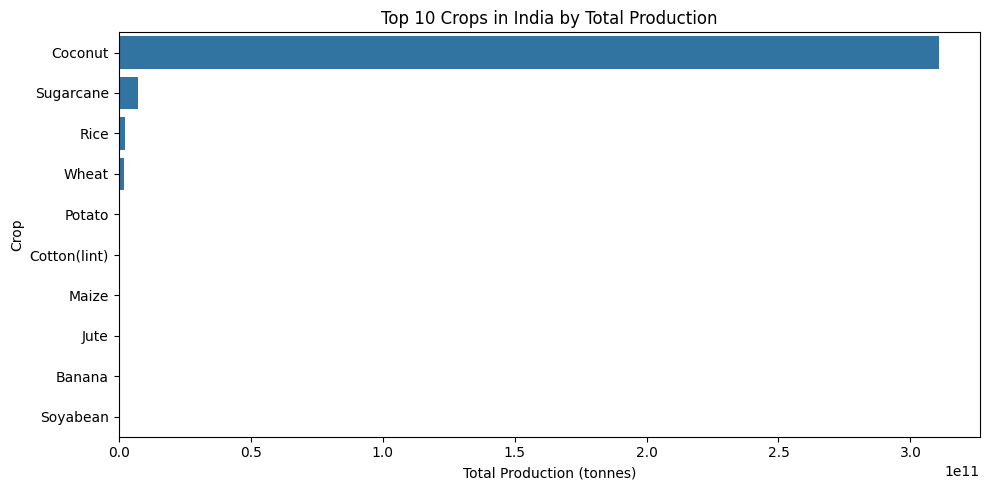

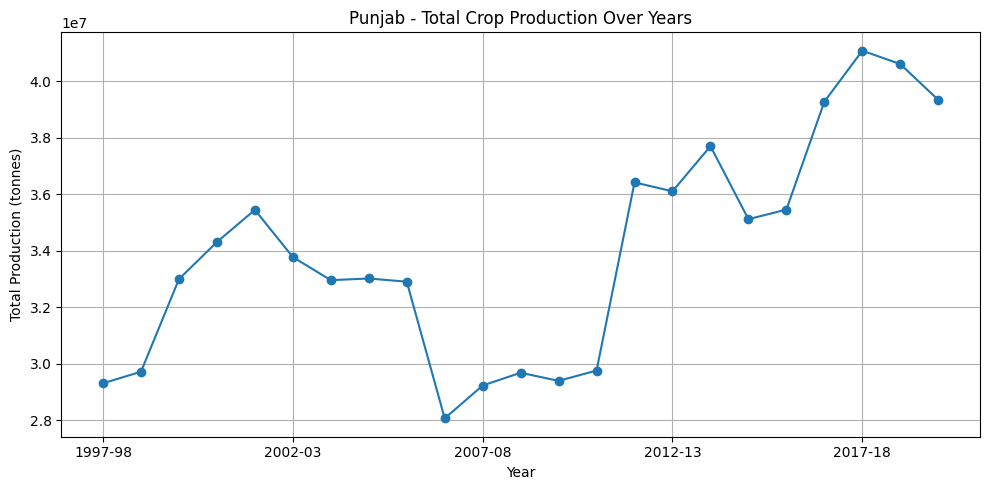

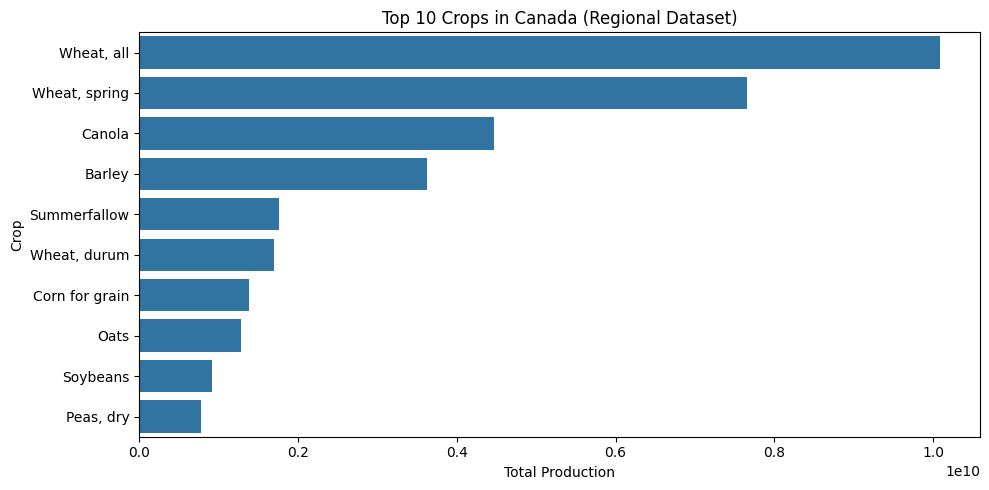

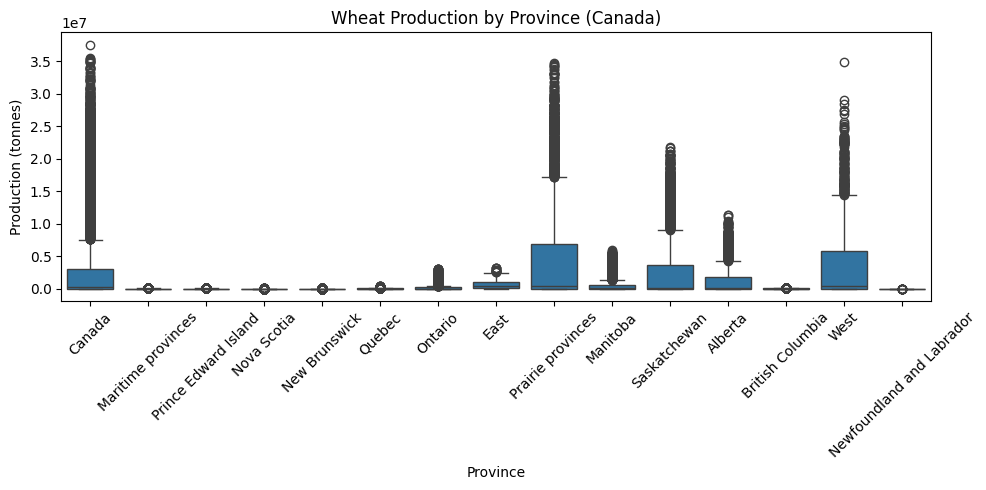

In [ ]:
#top crops in india by total production
top_crops_india = india_agri.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_crops_india.values, y=top_crops_india.index)
plt.title("Top 10 Crops in India by Total Production")
plt.xlabel("Total Production (tonnes)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

#punjab yearly production trend
punjab_data = india_agri[india_agri["State"].str.lower() == "punjab"]
punjab_by_year = punjab_data.groupby("Year")["Production"].sum()
plt.figure(figsize=(10,5))
punjab_by_year.plot(marker='o')
plt.title("Punjab - Total Crop Production Over Years")
plt.xlabel("Year")
plt.ylabel("Total Production (tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()

canada_regional.columns = canada_regional.columns.str.strip()

# total production per crop
top_crops_canada = canada_regional.groupby("Type of crop")["VALUE"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_crops_canada.values, y=top_crops_canada.index)
plt.title("Top 10 Crops in Canada (Regional Dataset)")
plt.xlabel("Total Production")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()
#compare wheat production across canadian provinces
canada_states.columns = canada_states.columns.str.strip()

# filter wheat data (case-insensitive)
# filter any crop type that contains "wheat"
wheat_data = canada_states[canada_states["Type of crop"].str.contains("wheat", case=False, na=False)]

# plot wheat production by province
plt.figure(figsize=(10, 5))
sns.boxplot(data=wheat_data, x="GEO", y="VALUE")
plt.title("Wheat Production by Province (Canada)")
plt.xlabel("Province")
plt.ylabel("Production (tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

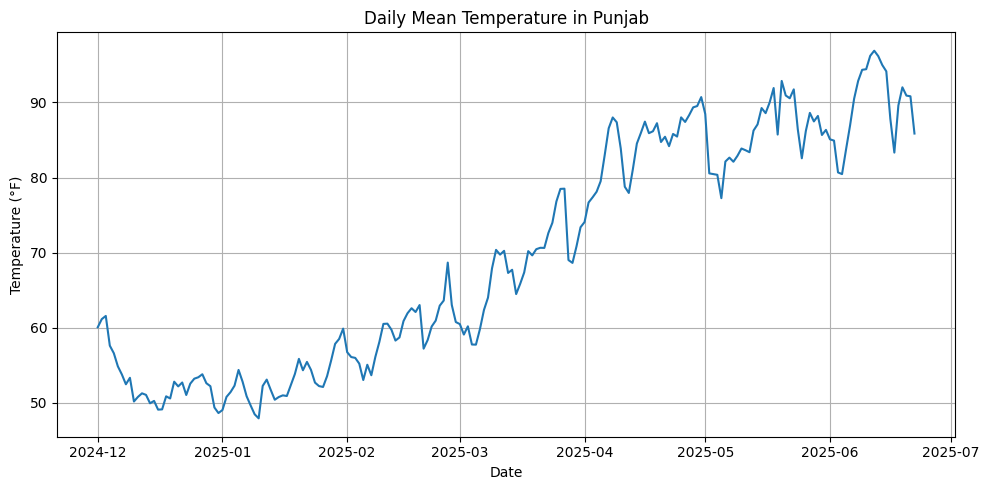

In [19]:
region_name = "Punjab"
region_weather = final_df[final_df["region"] == region_name]

plt.figure(figsize=(10, 5))
plt.plot(region_weather["date"], region_weather["temperature_2m_mean"], label="Mean Temp (°F)")
plt.title(f"Daily Mean Temperature in {region_name}")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

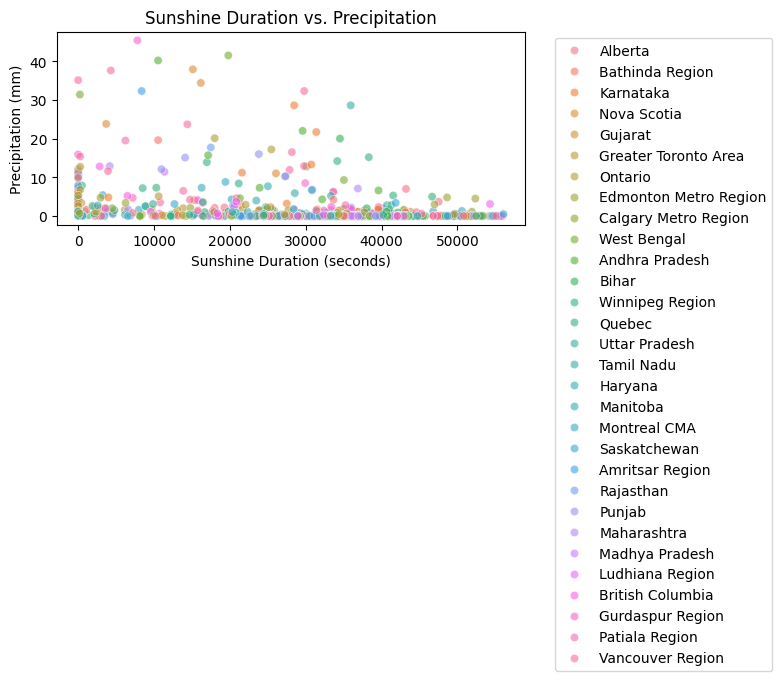

In [21]:
sample = final_df.sample(1000) 

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample, x="sunshine_duration", y="precipitation_sum", hue="region", alpha=0.6)
plt.title("Sunshine Duration vs. Precipitation")
plt.xlabel("Sunshine Duration (seconds)")
plt.ylabel("Precipitation (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

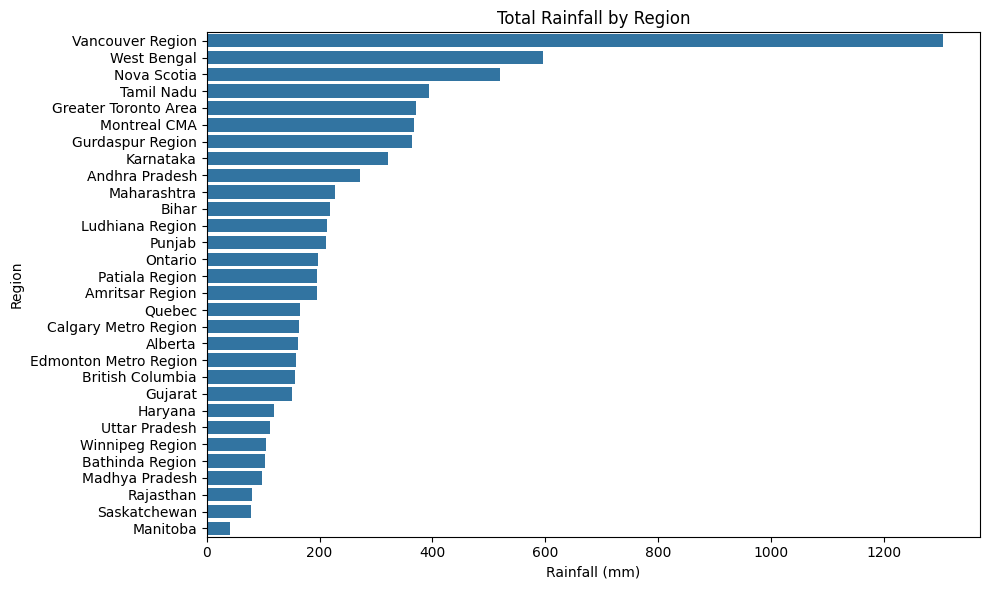

In [22]:
rain_by_region = final_df.groupby("region")["rain_sum"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rain_by_region.values, y=rain_by_region.index)
plt.title("Total Rainfall by Region")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

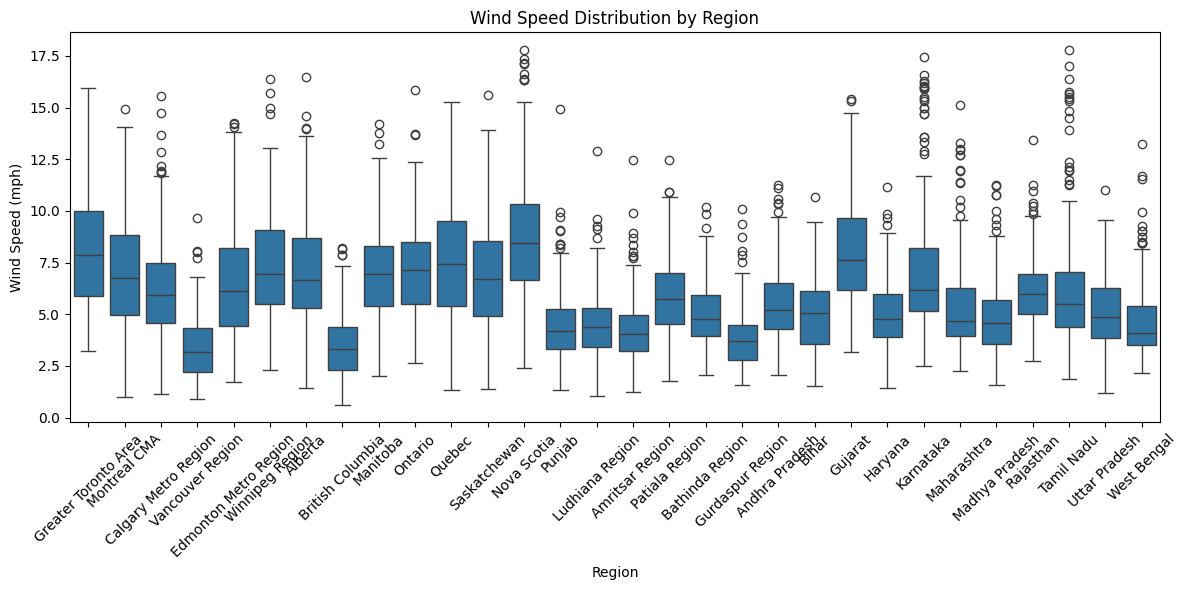

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df, x="region", y="wind_speed_10m_mean")
plt.title("Wind Speed Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jbain\AppData\Local\Temp\ipykernel_26128\3093372400.py:3: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_dfs = [pd.read_csv(f, parse_dates=['date']) for f in [



--- Seasonal Dataset ---
Rows: 27012, Columns: 262
Regions: 88
Crops: 46
Years: 1998 – 2019
----------------------------------------

--- Yearly Dataset ---
Rows: 6753, Columns: 276
Regions: 88
Crops: 46
Years: 1998 – 2019
----------------------------------------

--- Daily (Combined) Dataset ---
Rows: 4484120, Columns: 86
Regions: 33
Crops: crop    22
crop    25
dtype: int64
Years: 1998 – 2019
----------------------------------------


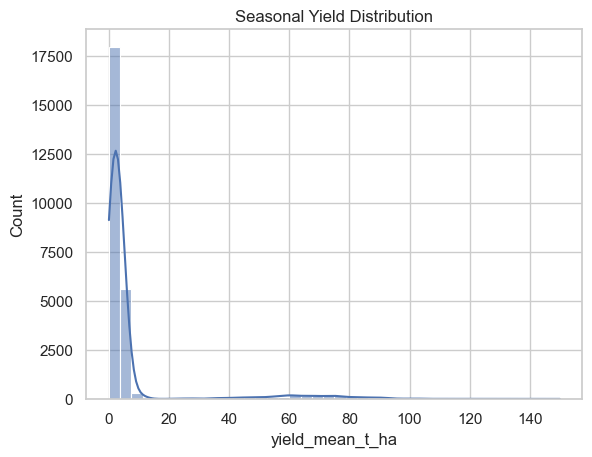

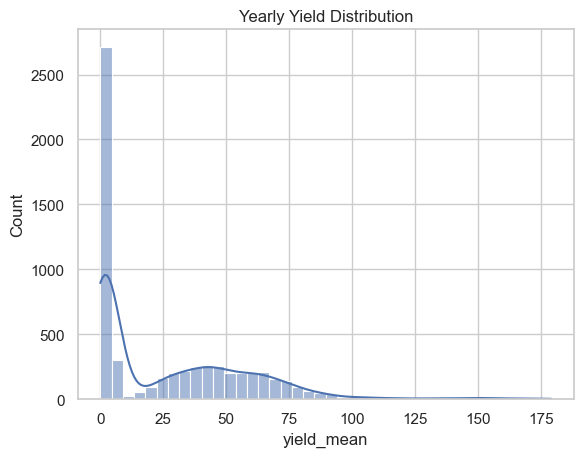

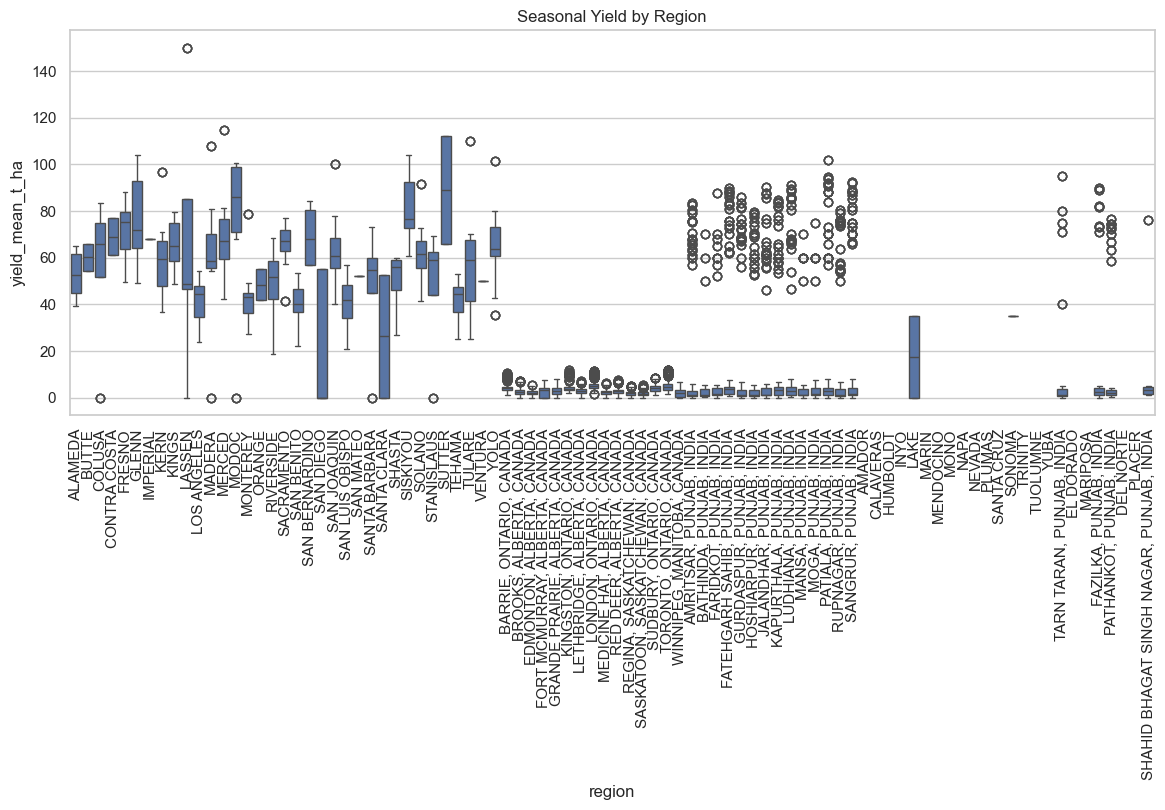

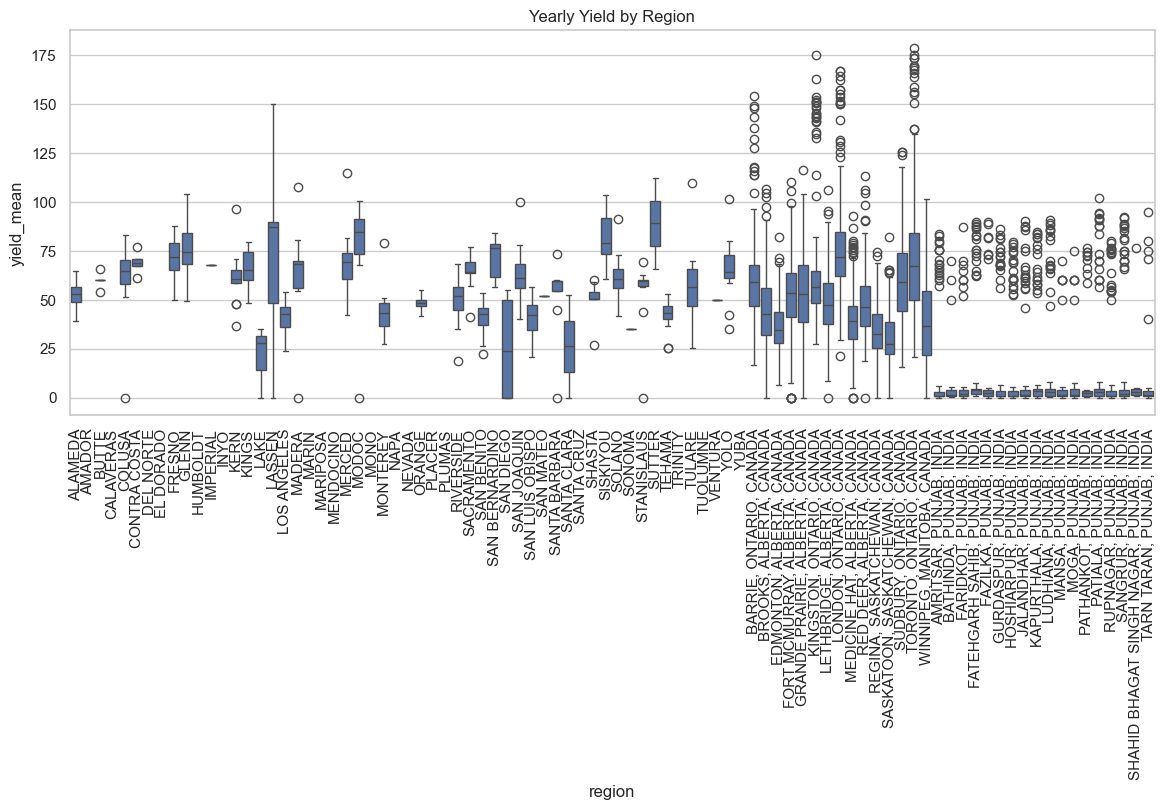

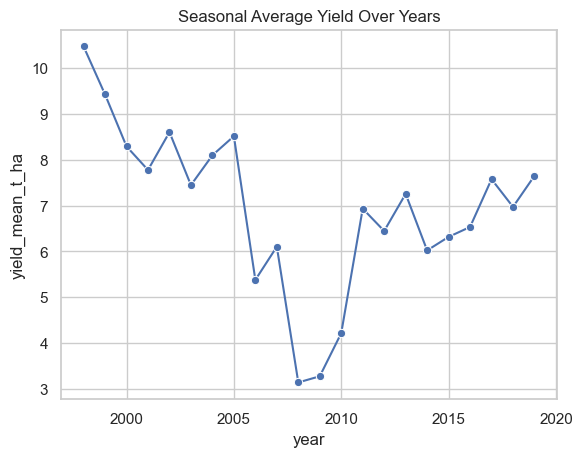

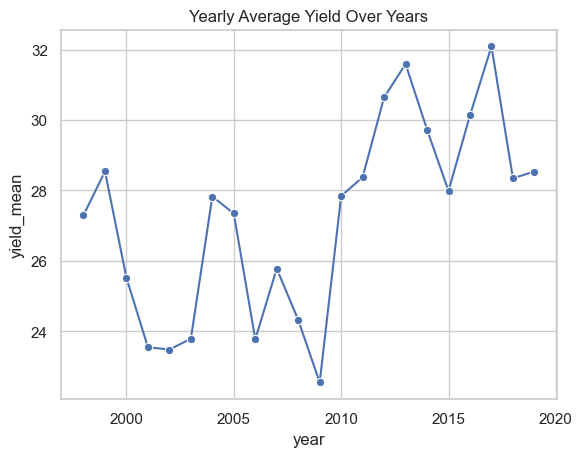

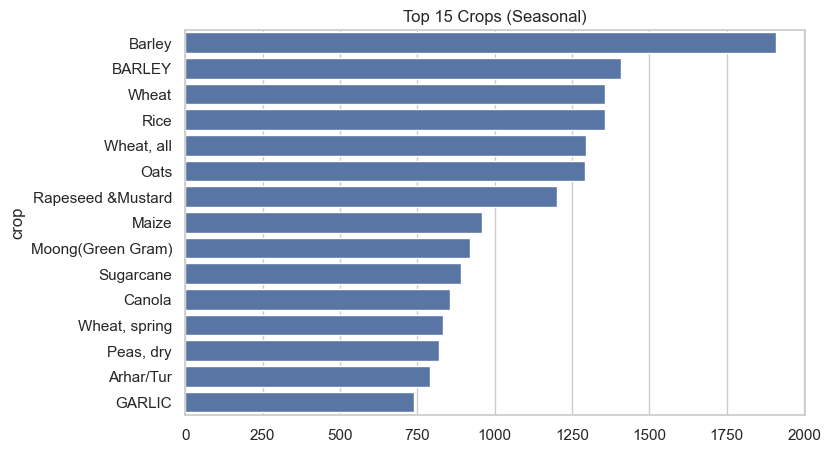

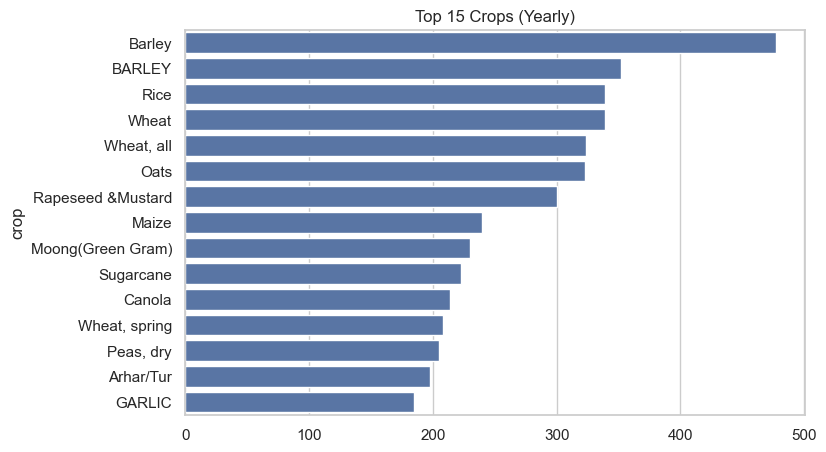

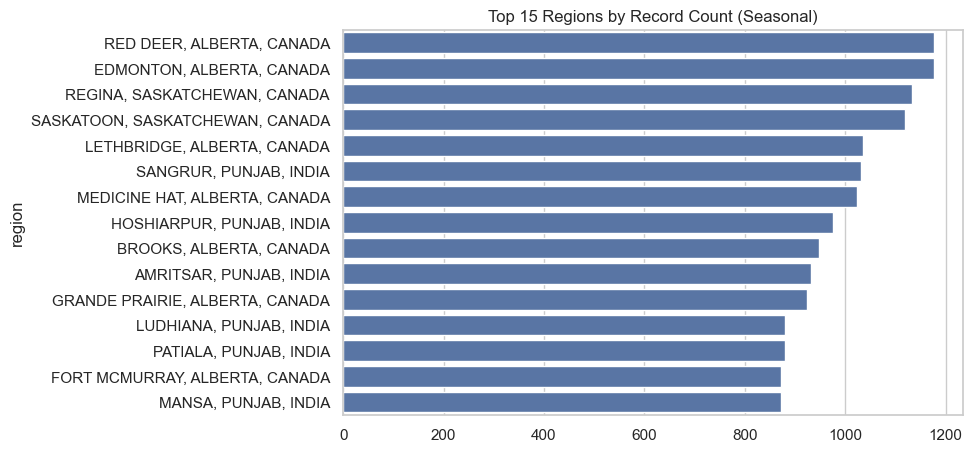

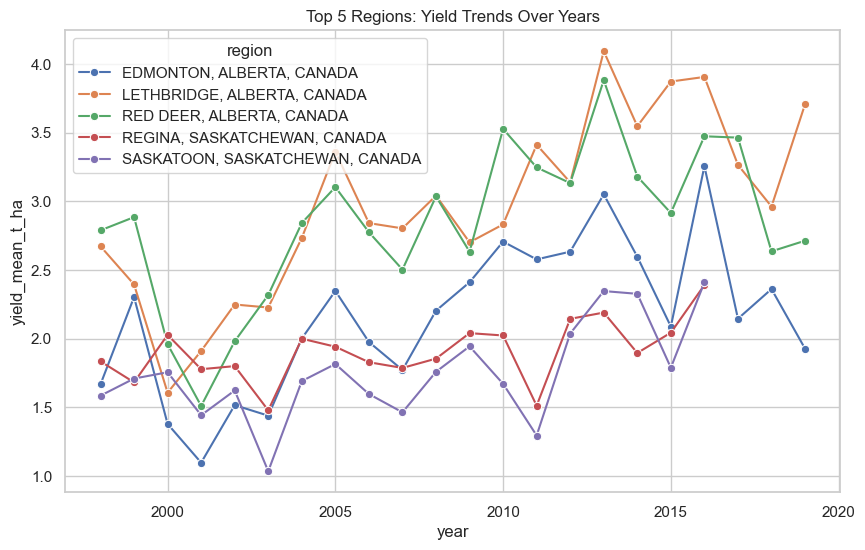

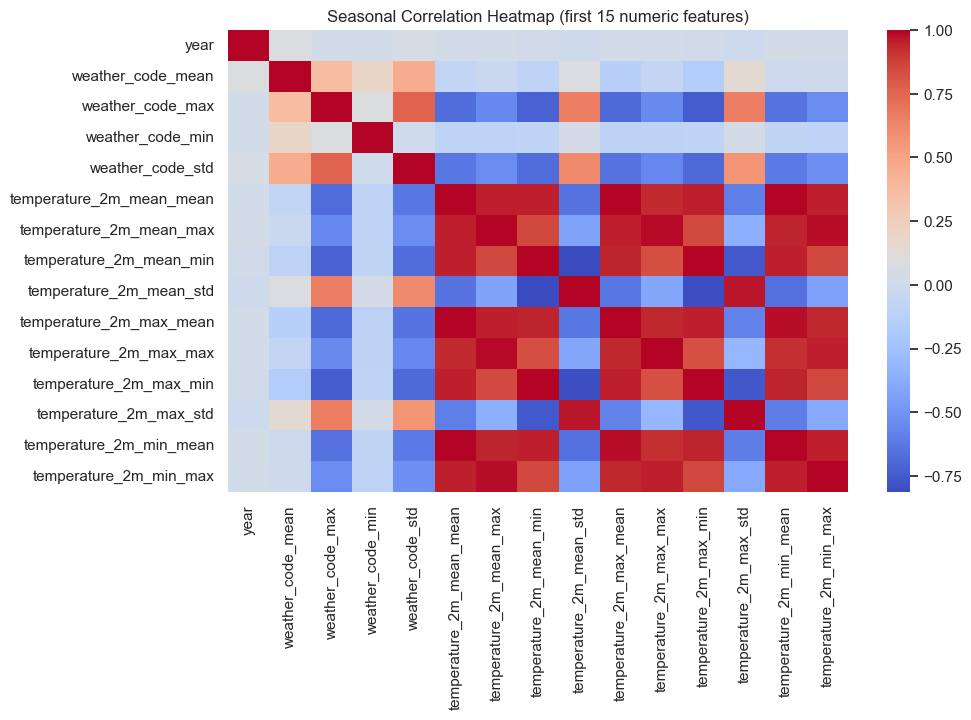

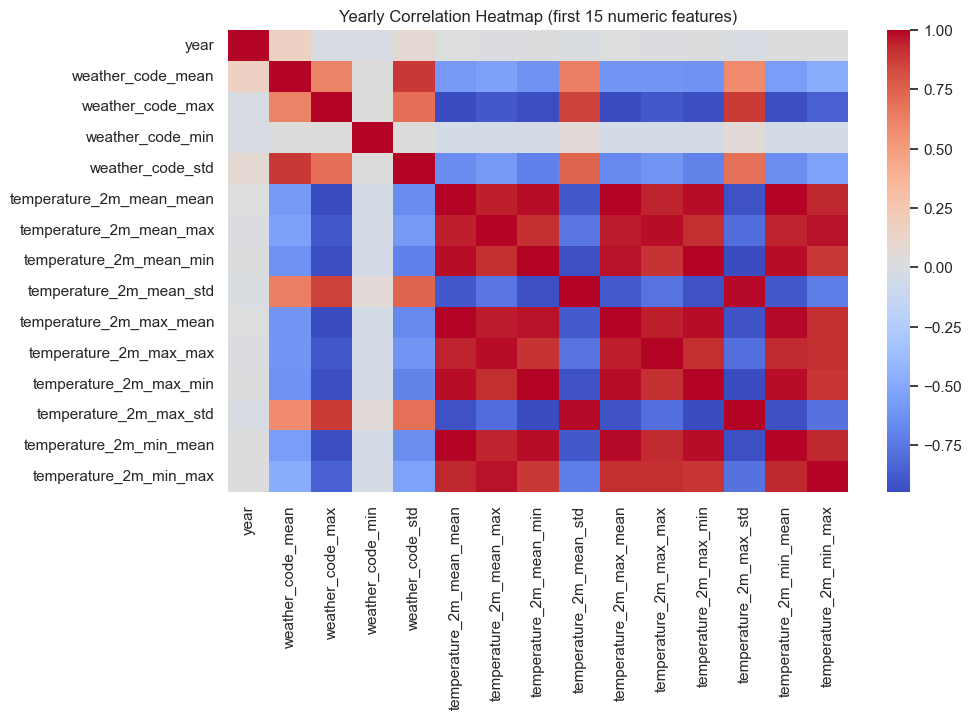

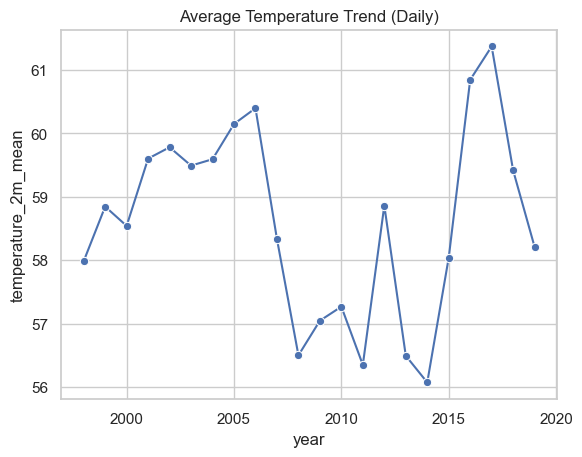

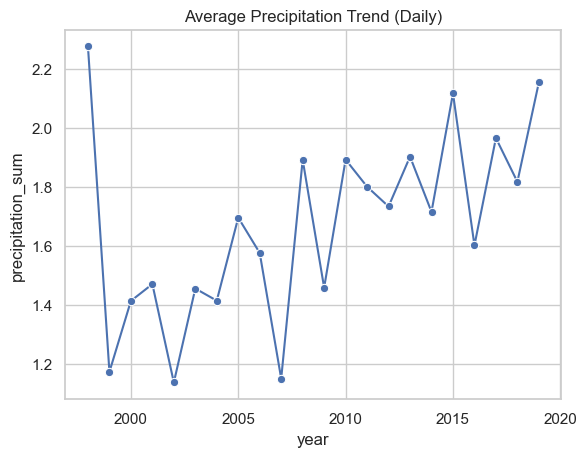

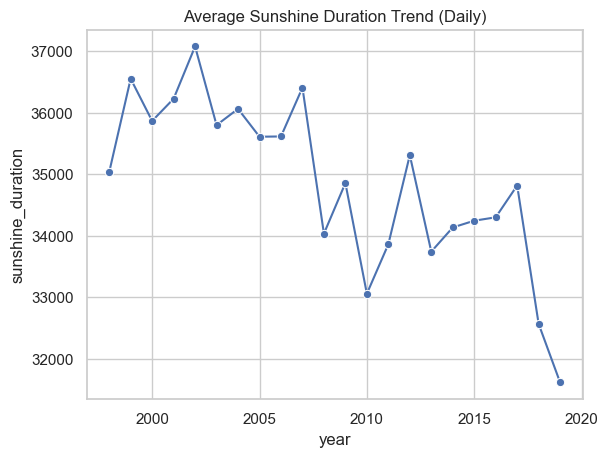

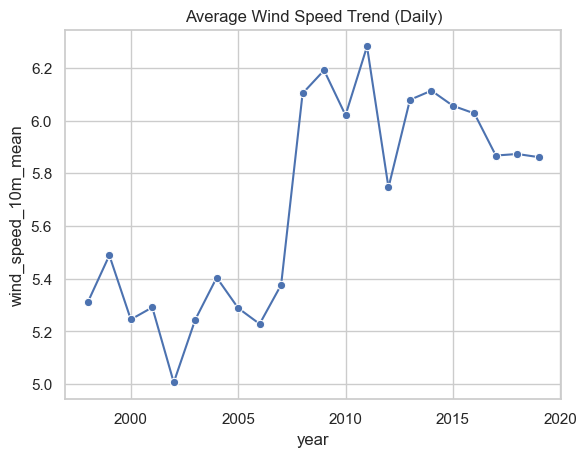

In [14]:

seasonal_df = pd.read_csv('seasonal_enriched.csv')
yearly_df = pd.read_csv('yearly_enriched.csv')
daily_dfs = [pd.read_csv(f, parse_dates=['date']) for f in [
    'punjab_weather_daily_with_yield.csv',
    'canada_weather_daily_with_yield.csv',
    'california_weather_daily_with_yield.csv'
]]
daily_df = pd.concat(daily_dfs, ignore_index=True)

for df in [seasonal_df, yearly_df, daily_df]:
    df.columns = df.columns.str.lower()

def get_yield_col(df):
    for c in df.columns:
        if 'yield' in c and 'mean' in c:
            return c
    return None

yield_seasonal = get_yield_col(seasonal_df)
yield_yearly = get_yield_col(yearly_df)

def dataset_stats(name, df):
    print(f"\n--- {name} Dataset ---")
    print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
    print(f"Regions: {df['region'].nunique()}")
    if 'crop' in df.columns: print(f"Crops: {df['crop'].nunique()}")
    if 'year' in df.columns: print(f"Years: {df['year'].min()} – {df['year'].max()}")
    print("-"*40)

dataset_stats("Seasonal", seasonal_df)
dataset_stats("Yearly", yearly_df)
dataset_stats("Daily (Combined)", daily_df)

sns.set(style="whitegrid")

for data, name, ycol in [(seasonal_df, "Seasonal", yield_seasonal), (yearly_df, "Yearly", yield_yearly)]:
    if ycol:
        plt.figure(); sns.histplot(data[ycol], bins=40, kde=True); plt.title(f"{name} Yield Distribution"); plt.show()


for data, name, ycol in [(seasonal_df, "Seasonal", yield_seasonal), (yearly_df, "Yearly", yield_yearly)]:
    if ycol:
        plt.figure(figsize=(14,5)); sns.boxplot(data=data, x='region', y=ycol); plt.title(f"{name} Yield by Region"); plt.xticks(rotation=90); plt.show()


for data, name, ycol in [(seasonal_df, "Seasonal", yield_seasonal), (yearly_df, "Yearly", yield_yearly)]:
    if ycol and 'year' in data.columns:
        trend = data.groupby('year')[ycol].mean().reset_index()
        plt.figure(); sns.lineplot(data=trend, x='year', y=ycol, marker="o"); plt.title(f"{name} Average Yield Over Years"); plt.show()


for data, name in [(seasonal_df, "Seasonal"), (yearly_df, "Yearly")]:
    crops = data['crop'].value_counts().head(15)
    plt.figure(figsize=(8,5)); sns.barplot(x=crops.values, y=crops.index); plt.title(f"Top 15 Crops ({name})"); plt.show()


regions = seasonal_df['region'].value_counts().head(15)
plt.figure(figsize=(8,5)); sns.barplot(x=regions.values, y=regions.index); plt.title("Top 15 Regions by Record Count (Seasonal)"); plt.show()


if yield_seasonal:
    reg_trends = seasonal_df.groupby(['year','region'])[yield_seasonal].mean().reset_index()
    top_regions = seasonal_df['region'].value_counts().head(5).index
    plt.figure(figsize=(10,6))
    sns.lineplot(data=reg_trends[reg_trends['region'].isin(top_regions)], x='year', y=yield_seasonal, hue='region', marker="o")
    plt.title("Top 5 Regions: Yield Trends Over Years")
    plt.show()


for data, name in [(seasonal_df, "Seasonal"), (yearly_df, "Yearly")]:
    plt.figure(figsize=(10,6)); sns.heatmap(data.corr(numeric_only=True).iloc[:15,:15], cmap="coolwarm"); plt.title(f"{name} Correlation Heatmap (first 15 numeric features)"); plt.show()


daily_df['year'] = daily_df['date'].dt.year
if 'temperature_2m_mean' in daily_df.columns:
    t = daily_df.groupby('year')['temperature_2m_mean'].mean().reset_index()
    plt.figure(); sns.lineplot(data=t, x='year', y='temperature_2m_mean', marker="o"); plt.title("Average Temperature Trend (Daily)"); plt.show()
if 'precipitation_sum' in daily_df.columns:
    p = daily_df.groupby('year')['precipitation_sum'].mean().reset_index()
    plt.figure(); sns.lineplot(data=p, x='year', y='precipitation_sum', marker="o"); plt.title("Average Precipitation Trend (Daily)"); plt.show()
if 'sunshine_duration' in daily_df.columns:
    s = daily_df.groupby('year')['sunshine_duration'].mean().reset_index()
    plt.figure(); sns.lineplot(data=s, x='year', y='sunshine_duration', marker="o"); plt.title("Average Sunshine Duration Trend (Daily)"); plt.show()
if 'wind_speed_10m_mean' in daily_df.columns:
    w = daily_df.groupby('year')['wind_speed_10m_mean'].mean().reset_index()
    plt.figure(); sns.lineplot(data=w, x='year', y='wind_speed_10m_mean', marker="o"); plt.title("Average Wind Speed Trend (Daily)"); plt.show()


In [5]:
API_KEY = "7BF8FEEB-5207-33AF-8327-74578B2A357D"
BASE_URL = "https://quickstats.nass.usda.gov/api/api_GET/"

crops = [
    "ARECANUT", "ARHAR/TUR", "BAJRA", "BANANA", "BARLEY", "BLACK PEPPER",
    "CANARY SEED", "CANOLA", "CARDAMOM", "CASHEWNUT", "CASTOR SEED", "CHICK PEAS",
    "COCONUT", "CORIANDER", "CORN FOR GRAIN", "COTTON(LINT)", "COWPEA(LOBIA)",
    "DRY GINGER", "DRY CHILLIES", "FLAXSEED", "GARLIC", "GINGER", "GRAM", "GROUNDNUT",
    "GUAR SEED", "HORSE-GRAM", "JOWAR", "JUTE", "KHESARI", "LENTILS"
]

def query_usda(crop, stat, unit):
    params = {
        "key": API_KEY,
        "commodity_desc": crop,
        "state_alpha": "CA",
        "statisticcat_desc": stat,
        "unit_desc": unit,
        "agg_level_desc": "COUNTY",
        "year__GE": 1990,
        "year__LE": 2020,
        "format": "JSON"
    }
    try:
        r = requests.get(BASE_URL, params=params, timeout=20)
        return r.json().get("data", [])
    except Exception as e:
        print(f"Error for {crop} ({stat}): {e}")
        return []

yield_data, area_data, prod_data = [], [], []

for crop in crops:
    print(f"Fetching data for {crop}...")

    yield_data.extend(query_usda(crop, "YIELD", "BU / ACRE"))
    area_data.extend(query_usda(crop, "AREA HARVESTED", "ACRES"))
    prod_data.extend(query_usda(crop, "PRODUCTION", "BU"))

    time.sleep(1)

def clean(df, value_name, unit_col):
    if not df:
        return pd.DataFrame(columns=["year", "region", "crop", value_name, unit_col])
    return (
        pd.DataFrame(df)[["year", "county_name", "commodity_desc", "Value", unit_col]]
        .rename(columns={
            "year": "year",
            "county_name": "region",
            "commodity_desc": "crop",
            "Value": value_name
        })
    )

df_yield = clean(yield_data, "yield", "unit_desc")
df_area = clean(area_data, "area", "unit_desc")
df_prod = clean(prod_data, "production", "unit_desc")

merged = df_yield.merge(df_area, on=["year", "region", "crop"], how="outer", suffixes=("_yield", "_area"))
merged = merged.merge(df_prod, on=["year", "region", "crop"], how="outer")

merged.rename(columns={"unit_desc": "unit_production"}, inplace=True)

merged.to_csv("california_crop_yield_enriched.csv", index=False)


Fetching data for ARECANUT...
Fetching data for ARHAR/TUR...
Fetching data for BAJRA...
Fetching data for BANANA...
Fetching data for BARLEY...
Fetching data for BLACK PEPPER...
Fetching data for CANARY SEED...
Fetching data for CANOLA...
Fetching data for CARDAMOM...
Fetching data for CASHEWNUT...
Fetching data for CASTOR SEED...
Fetching data for CHICK PEAS...
Fetching data for COCONUT...
Fetching data for CORIANDER...
Fetching data for CORN FOR GRAIN...
Fetching data for COTTON(LINT)...
Fetching data for COWPEA(LOBIA)...
Fetching data for DRY GINGER...
Fetching data for DRY CHILLIES...
Fetching data for FLAXSEED...
Fetching data for GARLIC...
Fetching data for GINGER...
Fetching data for GRAM...
Fetching data for GROUNDNUT...
Fetching data for GUAR SEED...
Fetching data for HORSE-GRAM...
Fetching data for JOWAR...
Fetching data for JUTE...
Fetching data for KHESARI...
Fetching data for LENTILS...


In [6]:

df = pd.read_csv("canada_regional.csv")

valid_dispositions = [
    "Harvested area (acres)",
    "Production (metric tonnes)",
    "Average yield (bushels per acre)",
    "Average yield (pounds per acre)"
]

df = df[df["Harvest disposition"].isin(valid_dispositions)]
df = df[df["VALUE"].notna()]

pivoted = df.pivot_table(
    index=["REF_DATE", "GEO", "Type of crop"],
    columns="Harvest disposition",
    values="VALUE",
    aggfunc="first"
).reset_index()

pivoted.columns.name = None
pivoted = pivoted.rename(columns={
    "REF_DATE": "year",
    "GEO": "region",
    "Type of crop": "crop",
    "Harvested area (acres)": "area",
    "Production (metric tonnes)": "production",
    "Average yield (bushels per acre)": "yield_bu_per_acre",
    "Average yield (pounds per acre)": "yield_lb_per_acre"
})


pivoted = pivoted[["year", "region", "crop", "yield_bu_per_acre", "yield_lb_per_acre", "area", "production"]]


pivoted.to_csv("canada_crop_yield_clean.csv", index=False)

C:\Users\jbain\AppData\Local\Temp\ipykernel_27032\259680853.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("canada_regional.csv")


In [9]:

df = pd.read_csv("canada_crop_yield_clean.csv")

region_mapping = {
    "Southern Ontario Region 1 - Ontario": "Toronto, Ontario, Canada",
    "Western Ontario Region 2 - Ontario": "London, Ontario, Canada",
    "Central Ontario Region 3 - Ontario": "Barrie, Ontario, Canada",
    "Eastern Ontario Region 4 - Ontario": "Kingston, Ontario, Canada",
    "Northern Ontario Region 5 - Ontario": "Sudbury, Ontario, Canada",
    "Small Area Data Region 1 - Manitoba": "Brandon, Manitoba, Canada",
    "Small Area Data Region 2 - Manitoba": "Portage la Prairie, Manitoba, Canada",
    "Small Area Data Region 3 - Manitoba": "Morden, Manitoba, Canada",
    "Small Area Data Region 4 - Manitoba": "Dauphin, Manitoba, Canada",
    "Small Area Data Region 5 - Manitoba": "Thompson, Manitoba, Canada",
    "Small Area Data Region 6 - Manitoba": "Steinbach, Manitoba, Canada",
    "Small Area Data Region 7 - Manitoba": "The Pas, Manitoba, Canada",
    "Small Area Data Region 8 - Manitoba": "Winkler, Manitoba, Canada",
    "Small Area Data Region 9 - Manitoba": "Selkirk, Manitoba, Canada",
    "Small Area Data Region 10 - Manitoba": "Winnipeg, Manitoba, Canada",
    "Small Area Data Region 11 - Manitoba": "Swan River, Manitoba, Canada",
    "Small Area Data Region 12 - Manitoba": "Flin Flon, Manitoba, Canada",
    "Small Area Data Region 1 - Saskatchewan": "Regina, Saskatchewan, Canada",
    "Small Area Data Region 2 - Saskatchewan": "Moose Jaw, Saskatchewan, Canada",
    "Small Area Data Region 3 - Saskatchewan": "Saskatoon, Saskatchewan, Canada",
    "Small Area Data Region 4 - Saskatchewan": "Estevan, Saskatchewan, Canada",
    "Small Area Data Region 5 - Saskatchewan": "Yorkton, Saskatchewan, Canada",
    "Small Area Data Region 6 - Saskatchewan": "Prince Albert, Saskatchewan, Canada",
    "Small Area Data Region 7 - Saskatchewan": "North Battleford, Saskatchewan, Canada",
    "Small Area Data Region 8 - Saskatchewan": "Melfort, Saskatchewan, Canada",
    "Small Area Data Region 9 - Saskatchewan": "Humboldt, Saskatchewan, Canada",
    "Small Area Data Region 10 - Saskatchewan": "Swift Current, Saskatchewan, Canada",
    "Small Area Data Region 11 - Saskatchewan": "Weyburn, Saskatchewan, Canada",
    "Small Area Data Region 12 - Saskatchewan": "Meadow Lake, Saskatchewan, Canada",
    "Small Area Data Region 13 - Saskatchewan": "Biggar, Saskatchewan, Canada",
    "Small Area Data Region 14 - Saskatchewan": "Kindersley, Saskatchewan, Canada",
    "Small Area Data Region 15 - Saskatchewan": "La Ronge, Saskatchewan, Canada",
    "Small Area Data Region 16 - Saskatchewan": "Nipawin, Saskatchewan, Canada",
    "Small Area Data Region 17 - Saskatchewan": "Melville, Saskatchewan, Canada",
    "Small Area Data Region 18 - Saskatchewan": "Tisdale, Saskatchewan, Canada",
    "Small Area Data Region 19 - Saskatchewan": "Wadena, Saskatchewan, Canada",
    "Small Area Data Region 20 - Saskatchewan": "Leader, Saskatchewan, Canada",
    "Small Area Data Region 10 - Alberta": "Edmonton, Alberta, Canada",
    "Small Area Data Region 20 - Alberta": "Red Deer, Alberta, Canada",
    "Small Area Data Region 30 - Alberta": "Lethbridge, Alberta, Canada",
    "Small Area Data Region 40 - Alberta": "Medicine Hat, Alberta, Canada",
    "Small Area Data Region 41 - Alberta": "Brooks, Alberta, Canada",
    "Small Area Data Region 50 - Alberta": "Grande Prairie, Alberta, Canada",
    "Small Area Data Region 60 - Alberta": "Fort McMurray, Alberta, Canada",
    "Small Area Data Region 70 - Alberta": "Peace River, Alberta, Canada",
    "Small Area Data Region 8 - Alberta": "Calgary, Alberta, Canada",
    "Small Area Data Region 13 - British Columbia": "Kelowna, British Columbia, Canada"
}

df["geolocation_name"] = df["region"].apply(lambda r: region_mapping.get(r, f"{r}, Canada"))
df.to_csv("canada_crop_yield_geolocated.csv", index=False)


In [13]:
region_df = pd.read_csv("final_region_list.csv")
regions = region_df["region"].dropna().unique()


geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=2, error_wait_seconds=2.0)


try:
    cached = pd.read_csv("geocoding_cache.csv")
    cache = dict(zip(cached["region"], zip(cached["latitude"], cached["longitude"])))
except FileNotFoundError:
    cache = {}

results = []
failed = []

for region in regions:
    if region in cache:
        lat, lon = cache[region]
    else:
        try:
            location = geocode(region)
            if location:
                lat, lon = location.latitude, location.longitude
                cache[region] = (lat, lon)
            else:
                lat, lon = None, None
        except Exception as e:
            print(f"Error: {region} → {e}")
            lat, lon = None, None

    results.append({"region": region, "latitude": lat, "longitude": lon})

    if lat is None or lon is None:
        failed.append(region)

    print(f"{region} → lat: {lat}, lon: {lon}")


pd.DataFrame(results).to_csv("region_geolocations.csv", index=False)
pd.DataFrame({"region": failed}).to_csv("failed_geocoding_regions.csv", index=False)

# Save cache
pd.DataFrame([
    {"region": r, "latitude": lat, "longitude": lon}
    for r, (lat, lon) in cache.items()
]).to_csv("geocoding_cache.csv", index=False)

print("✅ Done. Results saved to region_geolocations.csv")

24 Paraganas North, West Bengal, India → lat: None, lon: None
24 Paraganas South, West Bengal, India → lat: None, lon: None
ALAMEDA → lat: 37.6090291, lon: -121.899142
AMADOR → lat: 38.449089, lon: -120.5911018
Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec, Canada → lat: None, lon: None
Adilabad, Andhra Pradesh, India → lat: None, lon: None
Adilabad, Telangana, India → lat: 19.6759452, lon: 78.5339895
Agar Malwa, Madhya Pradesh, India → lat: 23.935092, lon: 76.1449595
Agra, Uttar Pradesh, India → lat: 27.1752554, lon: 78.0098161
Ahmadabad, Gujarat, India → lat: 23.0215374, lon: 72.5800568
Ahmednagar, Maharashtra, India → lat: 19.1627725, lon: 74.8580243
Aizawl, Mizoram, India → lat: 23.7433532, lon: 92.7382756
Ajmer, Rajasthan, India → lat: 26.4691, lon: 74.639
Akola, Maharashtra, India → lat: 20.7618122, lon: 77.1921157
Alappuzha, Kerala, India → lat: 9.5006651, lon: 76.4124143
Alberta, Canada → lat: 55.001251, lon: -115.002136
Aligarh, Uttar Pradesh, India → lat: 27.8761073, l

In [ ]:

weather = pd.read_csv("daily_weather_regions_1998_2020.csv", parse_dates=["date"])
weather["year"] = weather["date"].dt.year
weather["region_key"] = weather["region"].str.upper().str.strip()

yield_df = pd.read_csv("california_crop_yield_enriched.csv")
yield_df["region_key"] = yield_df["region"].str.upper().str.strip()
yield_df["year"] = yield_df["year"].astype(int)

merged = pd.merge(weather, yield_df, on=["region_key", "year"], how="inner")

merged.drop(columns=["region_x", "region_y"], errors="ignore", inplace=True)

merged.to_csv("california_weather_daily_with_yield.csv", index=False)
print(merged.head())


                       date  weather_code  temperature_2m_mean  \
0 1998-01-01 00:00:00+00:00           3.0            47.683704   
1 1998-01-01 00:00:00+00:00           3.0            47.683704   
2 1998-01-01 00:00:00+00:00           3.0            47.683704   
3 1998-01-01 00:00:00+00:00           3.0            47.683704   
4 1998-01-01 00:00:00+00:00           3.0            47.683704   

   temperature_2m_max  temperature_2m_min  apparent_temperature_mean  \
0             60.9737             39.6437                  45.057922   
1             60.9737             39.6437                  45.057922   
2             60.9737             39.6437                  45.057922   
3             60.9737             39.6437                  45.057922   
4             60.9737             39.6437                  45.057922   

   apparent_temperature_max  apparent_temperature_min    sunrise     sunset  \
0                 60.613434                  35.64252  883668156  883702808   
1           

In [ ]:
region_mapping = {
    "Southern Ontario Region 1 - Ontario": "Toronto, Ontario, Canada",
    "Western Ontario Region 2 - Ontario": "London, Ontario, Canada",
    "Central Ontario Region 3 - Ontario": "Barrie, Ontario, Canada",
    "Eastern Ontario Region 4 - Ontario": "Kingston, Ontario, Canada",
    "Northern Ontario Region 5 - Ontario": "Sudbury, Ontario, Canada",
    "Small Area Data Region 1 - Manitoba": "Brandon, Manitoba, Canada",
    "Small Area Data Region 2 - Manitoba": "Portage la Prairie, Manitoba, Canada",
    "Small Area Data Region 3 - Manitoba": "Morden, Manitoba, Canada",
    "Small Area Data Region 4 - Manitoba": "Dauphin, Manitoba, Canada",
    "Small Area Data Region 5 - Manitoba": "Thompson, Manitoba, Canada",
    "Small Area Data Region 6 - Manitoba": "Steinbach, Manitoba, Canada",
    "Small Area Data Region 7 - Manitoba": "The Pas, Manitoba, Canada",
    "Small Area Data Region 8 - Manitoba": "Winkler, Manitoba, Canada",
    "Small Area Data Region 9 - Manitoba": "Selkirk, Manitoba, Canada",
    "Small Area Data Region 10 - Manitoba": "Winnipeg, Manitoba, Canada",
    "Small Area Data Region 11 - Manitoba": "Swan River, Manitoba, Canada",
    "Small Area Data Region 12 - Manitoba": "Flin Flon, Manitoba, Canada",
    "Small Area Data Region 1 - Saskatchewan": "Regina, Saskatchewan, Canada",
    "Small Area Data Region 2 - Saskatchewan": "Moose Jaw, Saskatchewan, Canada",
    "Small Area Data Region 3 - Saskatchewan": "Saskatoon, Saskatchewan, Canada",
    "Small Area Data Region 4 - Saskatchewan": "Estevan, Saskatchewan, Canada",
    "Small Area Data Region 5 - Saskatchewan": "Yorkton, Saskatchewan, Canada",
    "Small Area Data Region 6 - Saskatchewan": "Prince Albert, Saskatchewan, Canada",
    "Small Area Data Region 7 - Saskatchewan": "North Battleford, Saskatchewan, Canada",
    "Small Area Data Region 8 - Saskatchewan": "Melfort, Saskatchewan, Canada",
    "Small Area Data Region 9 - Saskatchewan": "Humboldt, Saskatchewan, Canada",
    "Small Area Data Region 10 - Saskatchewan": "Swift Current, Saskatchewan, Canada",
    "Small Area Data Region 11 - Saskatchewan": "Weyburn, Saskatchewan, Canada",
    "Small Area Data Region 12 - Saskatchewan": "Meadow Lake, Saskatchewan, Canada",
    "Small Area Data Region 13 - Saskatchewan": "Biggar, Saskatchewan, Canada",
    "Small Area Data Region 14 - Saskatchewan": "Kindersley, Saskatchewan, Canada",
    "Small Area Data Region 15 - Saskatchewan": "La Ronge, Saskatchewan, Canada",
    "Small Area Data Region 16 - Saskatchewan": "Nipawin, Saskatchewan, Canada",
    "Small Area Data Region 17 - Saskatchewan": "Melville, Saskatchewan, Canada",
    "Small Area Data Region 18 - Saskatchewan": "Tisdale, Saskatchewan, Canada",
    "Small Area Data Region 19 - Saskatchewan": "Wadena, Saskatchewan, Canada",
    "Small Area Data Region 20 - Saskatchewan": "Leader, Saskatchewan, Canada",
    "Small Area Data Region 10 - Alberta": "Edmonton, Alberta, Canada",
    "Small Area Data Region 20 - Alberta": "Red Deer, Alberta, Canada",
    "Small Area Data Region 30 - Alberta": "Lethbridge, Alberta, Canada",
    "Small Area Data Region 40 - Alberta": "Medicine Hat, Alberta, Canada",
    "Small Area Data Region 41 - Alberta": "Brooks, Alberta, Canada",
    "Small Area Data Region 50 - Alberta": "Grande Prairie, Alberta, Canada",
    "Small Area Data Region 60 - Alberta": "Fort McMurray, Alberta, Canada",
    "Small Area Data Region 70 - Alberta": "Peace River, Alberta, Canada",
    "Small Area Data Region 8 - Alberta": "Calgary, Alberta, Canada",
    "Small Area Data Region 13 - British Columbia": "Kelowna, British Columbia, Canada"
}


weather_df = pd.read_csv("daily_weather_regions_1998_2020.csv", parse_dates=["date"])
yield_df = pd.read_csv("canada_crop_yield_geolocated.csv")

weather_df["region"] = weather_df["region"].str.upper().str.strip()
yield_df["region"] = yield_df["region"].map(region_mapping).str.upper().str.strip()
yield_df["year"] = yield_df["year"].astype(int)
weather_df["year"] = weather_df["date"].dt.year

merged_df = pd.merge(weather_df, yield_df, how="inner", on=["region", "year"])


merged_df.to_csv("canada_weather_daily_with_yield.csv", index=False)


print("Merged rows:", len(merged_df))
print(merged_df[["date", "region", "year", "crop", "yield_bu_per_acre"]].head())

Merged rows: 1124202
                       date                   region  year          crop  \
0 1998-01-01 00:00:00+00:00  BROOKS, ALBERTA, CANADA  1998        Barley   
1 1998-01-01 00:00:00+00:00  BROOKS, ALBERTA, CANADA  1998        Canola   
2 1998-01-01 00:00:00+00:00  BROOKS, ALBERTA, CANADA  1998      Flaxseed   
3 1998-01-01 00:00:00+00:00  BROOKS, ALBERTA, CANADA  1998       Lentils   
4 1998-01-01 00:00:00+00:00  BROOKS, ALBERTA, CANADA  1998  Mustard seed   

   yield_bu_per_acre  
0               48.2  
1               24.3  
2               16.4  
3                NaN  
4                NaN  


In [ ]:

weather_df = pd.read_csv("daily_weather_regions_1998_2020.csv", parse_dates=["date"])
yield_df = pd.read_csv("india_crop_yield_geolocated.csv")

weather_df["region"] = weather_df["region"].str.upper().str.strip()
yield_df["geolocation_name"] = yield_df["geolocation_name"].str.upper().str.strip()

yield_df["Year"] = yield_df["Year"].astype(str).str.extract(r"(\d{4})").astype(int)

weather_df["year"] = weather_df["date"].dt.year

yield_df = yield_df.rename(columns={"geolocation_name": "region", "Year": "year"})

merged_df = pd.merge(weather_df, yield_df, how="inner", on=["region", "year"])

merged_df.to_csv("punjab_weather_daily_with_yield.csv", index=False)

print("Merged rows:", len(merged_df))
print(merged_df[["date", "region", "year", "Crop", "Yield"]].head())


Merged rows: 1150839
                       date                   region  year          Crop  \
0 1998-01-01 00:00:00+00:00  AMRITSAR, PUNJAB, INDIA  1998     Arhar/Tur   
1 1998-01-01 00:00:00+00:00  AMRITSAR, PUNJAB, INDIA  1998  Cotton(lint)   
2 1998-01-01 00:00:00+00:00  AMRITSAR, PUNJAB, INDIA  1998          Gram   
3 1998-01-01 00:00:00+00:00  AMRITSAR, PUNJAB, INDIA  1998         Maize   
4 1998-01-01 00:00:00+00:00  AMRITSAR, PUNJAB, INDIA  1998        Masoor   

      Yield  
0  0.636364  
1  0.750000  
2  0.090909  
3  2.333333  
4  0.857143  


In [ ]:


df = pd.read_csv("canada_weather_daily_with_yield.csv", parse_dates=["date"])


df["week"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)


weather_cols = [
    "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min",
    "precipitation_sum", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
    "wind_speed_10m_mean", "wind_gusts_10m_mean", "cloud_cover_mean",
    "relative_humidity_2m_mean", "soil_moisture_0_to_100cm_mean",
    "soil_temperature_0_to_100cm_mean", "et0_fao_evapotranspiration"
]

yield_cols = ["yield_bu_per_acre", "area", "production"]

weekly_df = df.groupby(["region", "crop", "week"])[weather_cols + yield_cols].mean().reset_index()

weekly_df.to_csv("canada_weather_weekly_with_yield.csv", index=False)

print("Original rows:", len(df))
print("Weekly aggregated rows:", len(weekly_df))



C:\Users\jbain\AppData\Local\Temp\ipykernel_17916\2704800881.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)


Original rows: 1124202
Weekly aggregated rows: 160964


In [24]:
df_ca = pd.read_csv("california_weather_daily_with_yield.csv", parse_dates=["date"])


df_ca["area"] = pd.to_numeric(df_ca["area"].astype(str).str.replace(",", ""), errors="coerce")
df_ca["production"] = pd.to_numeric(df_ca["production"].astype(str).str.replace(",", ""), errors="coerce")


df_ca["week"] = df_ca["date"].dt.to_period("W").apply(lambda r: r.start_time)

weather_cols = [
    "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min",
    "precipitation_sum", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
    "wind_speed_10m_mean", "wind_gusts_10m_mean", "cloud_cover_mean",
    "relative_humidity_2m_mean", "soil_moisture_0_to_100cm_mean",
    "soil_temperature_0_to_100cm_mean", "et0_fao_evapotranspiration"
]

yield_cols = ["yield", "area", "production"]

weekly_ca = df_ca.groupby(["region_key", "crop", "week"])[weather_cols + yield_cols].mean().reset_index()

weekly_ca.to_csv("california_weather_weekly_with_yield.csv", index=False)
print("Weekly file saved with shape:", weekly_ca.shape)


C:\Users\jbain\AppData\Local\Temp\ipykernel_17916\3088151432.py:1: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ca = pd.read_csv("california_weather_daily_with_yield.csv", parse_dates=["date"])
C:\Users\jbain\AppData\Local\Temp\ipykernel_17916\3088151432.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ca["week"] = df_ca["date"].dt.to_period("W").apply(lambda r: r.start_time)


Weekly file saved with shape: (28905, 20)


In [21]:

df_pb = pd.read_csv("punjab_weather_daily_with_yield.csv", parse_dates=["date"])


df_pb["week"] = df_pb["date"].dt.to_period("W").apply(lambda r: r.start_time)


weather_cols = [
    "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min",
    "precipitation_sum", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
    "wind_speed_10m_mean", "wind_gusts_10m_mean", "cloud_cover_mean",
    "relative_humidity_2m_mean", "soil_moisture_0_to_100cm_mean",
    "soil_temperature_0_to_100cm_mean", "et0_fao_evapotranspiration"
]

yield_cols = ["Yield", "Area", "Production"]


weekly_pb = df_pb.groupby(["region", "Crop", "week"])[weather_cols + yield_cols].mean().reset_index()

weekly_pb.to_csv("punjab_weather_weekly_with_yield.csv", index=False)

print("Punjab - original rows:", len(df_pb))
print("Punjab - weekly rows:", len(weekly_pb))


C:\Users\jbain\AppData\Local\Temp\ipykernel_17916\3904635975.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pb["week"] = df_pb["date"].dt.to_period("W").apply(lambda r: r.start_time)


Punjab - original rows: 1150839
Punjab - weekly rows: 163665


In [33]:
df_ca = pd.read_csv("california_weather_weekly_with_yield.csv")
df_canada = pd.read_csv("canada_weather_weekly_with_yield.csv")
df_punjab = pd.read_csv("punjab_weather_weekly_with_yield.csv")


df_ca.columns = df_ca.columns.str.lower()
df_canada.columns = df_canada.columns.str.lower()
df_punjab.columns = df_punjab.columns.str.lower()

df_ca = df_ca.rename(columns={"region_key": "region"})
df_canada = df_canada.rename(columns={"yield_bu_per_acre": "yield"})
df_punjab = df_punjab.rename(columns={"production": "production", "area": "area"})  # just in case

df_ca["source_region"] = "california"
df_canada["source_region"] = "canada"
df_punjab["source_region"] = "punjab"

common_cols = df_ca.columns.tolist()
df_canada = df_canada[common_cols]
df_punjab = df_punjab[common_cols]


df_all = pd.concat([df_ca, df_canada, df_punjab], ignore_index=True)


df_all.to_csv("all_regions_weather_weekly_with_yield.csv", index=False)



## ==============================================================================================================================
## yearly aggregate processed data
## ==============================================================================================================================

In [ ]:

# load all columns, keep memory-friendly dtypes
def load_all(path, region_name):
    df = pd.read_csv(path, parse_dates=["date"])
    df.columns = df.columns.str.lower()
    df["source_region"] = region_name
    for col in df.select_dtypes(include=["float64","int64"]).columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("float32")
    return df

punjab = load_all("punjab_weather_daily_with_yield.csv","punjab")
canada = load_all("canada_weather_daily_with_yield.csv","canada")
california = load_all("california_weather_daily_with_yield.csv","california")

california.rename(columns={"region_key":"region"}, inplace=True)

df = pd.concat([punjab, canada, california], ignore_index=True)

# temporal features
df["year"] = df["date"].dt.year.astype("int16")
df["week_num"] = df["date"].dt.isocalendar().week.astype("int16")
df["month"] = df["date"].dt.month.astype("int8")
df["season"] = pd.cut(df["month"], bins=[0,2,5,8,11,12],
                      labels=["winter","spring","summer","fall","winter2"], right=True)
df["season"] = df["season"].replace("winter2","winter")

# group numeric columns (skip non-numeric)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
agg_funcs = {col: ["mean","max","min","std"] for col in numeric_cols if col not in ["year","week_num"]}

# function to aggregate by chunks
def aggregate_in_chunks(df, group_cols, save_path):
    all_chunks = []
    for yr in df["year"].unique():
        chunk = df[df["year"] == yr]
        agg_chunk = chunk.groupby(group_cols, observed=True).agg(agg_funcs).reset_index()
        agg_chunk.columns = ["_".join(c).strip("_") for c in agg_chunk.columns.values]
        all_chunks.append(agg_chunk)
        print(f"✔ aggregated {yr} for {save_path}")
    final = pd.concat(all_chunks, ignore_index=True)
    final.to_csv(save_path, index=False)

# weekly
aggregate_in_chunks(df, ["source_region","region","crop","year","week_num"], "weekly_enriched.csv")

# seasonal
aggregate_in_chunks(df, ["source_region","region","crop","year","season"], "seasonal_enriched.csv")

# yearly
aggregate_in_chunks(df, ["source_region","region","crop","year"], "yearly_enriched.csv")

print("All aggregations completed with all features.")


C:\Users\jbain\AppData\Local\Temp\ipykernel_26128\1373648732.py:3: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, parse_dates=["date"])
C:\Users\jbain\AppData\Local\Temp\ipykernel_26128\1373648732.py:24: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["season"] = df["season"].replace("winter2","winter")


✔ aggregated 1998 for seasonal_enriched_test.csv
✔ aggregated 1999 for seasonal_enriched_test.csv
✔ aggregated 2000 for seasonal_enriched_test.csv
✔ aggregated 2001 for seasonal_enriched_test.csv
✔ aggregated 2002 for seasonal_enriched_test.csv
✔ aggregated 2003 for seasonal_enriched_test.csv
✔ aggregated 2004 for seasonal_enriched_test.csv
✔ aggregated 2005 for seasonal_enriched_test.csv
✔ aggregated 2006 for seasonal_enriched_test.csv
✔ aggregated 2007 for seasonal_enriched_test.csv
✔ aggregated 2008 for seasonal_enriched_test.csv
✔ aggregated 2009 for seasonal_enriched_test.csv
✔ aggregated 2010 for seasonal_enriched_test.csv
✔ aggregated 2011 for seasonal_enriched_test.csv
✔ aggregated 2012 for seasonal_enriched_test.csv
✔ aggregated 2013 for seasonal_enriched_test.csv
✔ aggregated 2014 for seasonal_enriched_test.csv
✔ aggregated 2015 for seasonal_enriched_test.csv
✔ aggregated 2016 for seasonal_enriched_test.csv
✔ aggregated 2017 for seasonal_enriched_test.csv
✔ aggregated 2018 fo

In [ ]:
import pandas as pd
import numpy as np

# load aggregated seasonal dataset
df = pd.read_csv("seasonal_enriched.csv")

# conversion functions
def bu_acre_to_tha(x):
    return x * 27.216 / 1000 / 0.4047  # bushels → tonnes per hectare

def lb_acre_to_tha(x):
    return x * 0.4536 / 1000 / 0.4047  # pounds → tonnes per hectare

# create unified yield_mean_t_ha
df["yield_mean_t_ha"] = np.nan

# 1. use California's yield_mean directly where it exists
if "yield_mean" in df.columns:
    mask = df["yield_mean"].notna()
    df.loc[mask, "yield_mean_t_ha"] = df.loc[mask, "yield_mean"]

# 2. convert from bu/acre where still missing
if "yield_bu_per_acre_mean" in df.columns:
    mask = df["yield_mean_t_ha"].isna() & df["yield_bu_per_acre_mean"].notna()
    df.loc[mask, "yield_mean_t_ha"] = bu_acre_to_tha(df.loc[mask, "yield_bu_per_acre_mean"])

# 3. convert from lb/acre where still missing
if "yield_lb_per_acre_mean" in df.columns:
    mask = df["yield_mean_t_ha"].isna() & df["yield_lb_per_acre_mean"].notna()
    df.loc[mask, "yield_mean_t_ha"] = lb_acre_to_tha(df.loc[mask, "yield_lb_per_acre_mean"])

# 4. drop original yield columns only after merging and conversion is complete
yield_cols = [c for c in df.columns if c.startswith("yield_") and c != "yield_mean_t_ha"]
df.drop(columns=yield_cols, inplace=True)

# save cleaned dataset
df.to_csv("seasonal_enriched_yield_unified.csv", index=False)
print("Saved seasonal_enriched_yield_unified.csv with a single yield_mean_t_ha column correctly populated.")


✅ Saved seasonal_enriched_yield_unified.csv with a single yield_mean_t_ha column correctly populated.
